In [1]:
import numpy as np
from scipy.linalg import solve
from pandas import DataFrame
import matplotlib.pyplot as plt

# 1. Runge 效应
## (a) Polynomial Interpolation with Same Intervals
First, we construct the Neville algorithm as a function, which receives coordinates of n+1 nodes as input and return an interpolation polynomial of n-th degree. I use a simple nodes to test its correctness.

Here we use a numpy class named "poly1d" to construct a polynomial from a list of coefficients. More information in https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html.

In [2]:
def Neville(nodes):
    n = len(nodes) - 1
    T = [[None for j in range(n+1)] for i in range(n+1)] # T[i][j] stands for T_j,i
    T[0] = [np.poly1d([nodes[i][1]])  for i in range(n+1)]
    for k in range(1, n+1):
        for j in range(k, n+1):
            T[k][j] = ([1, -nodes[j-k][0]] * T[k-1][j] - [1, -nodes[j][0]] * T[k-1][j-1]) /\
            (nodes[j][0] - nodes[j-k][0])
    return T[n][-1] # T[n][n] is the final result
    
print(Neville([[1,1],[2,4],[3,9],[4,16], [5,25]]))

   2
1 x


Construct Runge function. Compute 21 uniform nodes of it on [-1,1] and 41 points (including midpoints) equally dividing the interval.

In [3]:
def Runge(x):
    return 1 / (1 + 25 * x * x)

order_of_interpolation = 20
interval = 2 / order_of_interpolation

uniform_nodes_of_Runge = [[x, Runge(x)] for x in np.arange(-1, 1+interval, interval)]
uniform_points_of_Runge = [x for x in np.arange(-1, 1+interval/2, interval/2)]

Calculate $f(x),\ P_{20}(x),\ |P_{20}(x)-f(x)|$ for each dividing points. The result is showed in the table below.

In [4]:
P20 = Neville(uniform_nodes_of_Runge)
P20_values = P20(np.array(uniform_points_of_Runge))
Runge_values = Runge(np.array(uniform_points_of_Runge))

df = DataFrame({'x':uniform_points_of_Runge, 'P20(x)':P20_values,
                'f(x)':Runge_values, '|P20(x)-f(x)|':abs(P20_values - Runge_values)},
               columns=['x', 'f(x)', 'P20(x)', '|P20(x)-f(x)|'])
df.round({'x': 2})


,x,f(x),P20(x),|P20(x)-f(x)|
0,-1.00,0.038462,0.038462,2.030601e-11
1,-0.95,0.042440,-39.952449,3.999489e+01
2,-0.90,0.047059,0.047059,8.011099e-12
3,-0.85,0.052459,3.454958,3.402499e+00
4,-0.80,0.058824,0.058824,3.293685e-12
5,-0.75,0.066390,-0.447052,5.134420e-01
6,-0.70,0.075472,0.075472,6.617346e-13
7,-0.65,0.086486,0.202423,1.159361e-01
8,-0.60,0.100000,0.100000,1.325468e-13
9,-0.55,0.116788,0.080660,3.612833e-02


We see $P_{20}(x)$ fits $f(x)$ near the origin, but the differences between them become enormous when x deviates from the origin. When $x=\pm 0.95$, interpolation polynomial has a deviation of approximately 40!

Draw the following diagram to illustrate the difference, which shows the values of $f(x)$ and $P_{20}(x)$ on the 41 dividing points together.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


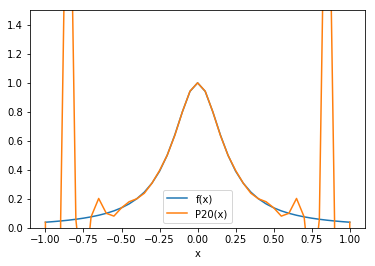

In [5]:
df.plot.line(x='x', y=['f(x)','P20(x)'], ylim=[0,1.5])

And draw this diagram to show the values of $|P_{20}(x)-f(x)|$.

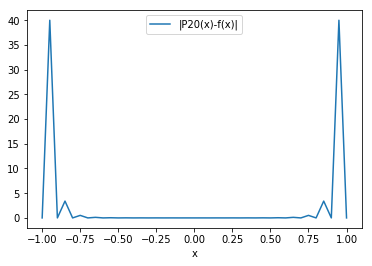

In [6]:
df.plot.line(x='x', y='|P20(x)-f(x)|')

## (b) Chebyshev Interpolation

First, construct 20 standard Chebyshev nodes.

In [7]:
number_of_Chebyshev_nodes = 20 # N
Chebyshev_nodes = [np.cos(np.pi * (k + 1/2) / number_of_Chebyshev_nodes) for k in range(20)]

Then, compute the coefficient of each Chebyshev polynomial $c_m$. Given that Runge function is even, $c_m$ should be 0 when $m$ is odd. In our result, they turn out to be very small instead.

In [8]:
coefficients_of_Chebyshev = []
for m in range(number_of_Chebyshev_nodes):
    coefficient = 0
    for k in range(number_of_Chebyshev_nodes):
        coefficient = coefficient +\
        np.cos(m * np.pi *(k + 1/2) / number_of_Chebyshev_nodes) *\
        Runge(np.cos(np.pi * (k + 1/2) / number_of_Chebyshev_nodes))
    coefficient = coefficient * (2 - (m==0)) / number_of_Chebyshev_nodes
    coefficients_of_Chebyshev.append(coefficient)
    
for i in range(len(coefficients_of_Chebyshev)):
    print('c', i ,'=', coefficients_of_Chebyshev[i])

c 0 = 0.19597752688801637
c 1 = -1.1796119636642288e-17
c 2 = -0.2633114580781154
c 3 = 6.245004513516506e-18
c 4 = 0.1767976956726966
c 5 = -8.326672684688674e-17
c 6 = -0.118571564574909
c 7 = 1.4641066137244253e-16
c 8 = 0.07931688380910713
c 9 = 1.97758476261356e-17
c 10 = -0.052752904452762185
c 11 = -6.210310043996969e-17
c 12 = 0.03462938980885903
c 13 = -1.457167719820518e-17
c 14 = -0.02204657753437378
c 15 = 2.114627917215728e-16
c 16 = 0.012991217665388414
c 17 = -3.157196726277789e-17
c 18 = -0.006014452622864767
c 19 = -3.690624195140657e-17


Use Clenshaw's algorithm to get the expansion under Chebyshev polynomial $S(x)$. Again, odd-order entries should have cofficients of zero. But very small coefficients are given instead.

In [9]:
def Clenshaw(coefficients, alpha, beta, F_0, F_1):
    N = len(coefficients) - 1
    b = [None] * (N+1) + [np.poly1d([0])] * 2
    for k in range(N, 0, -1):
        b[k] = np.poly1d([coefficients[k]]) + alpha[k] * b[k+1] + beta[k+1] * b[k+2]
    return np.poly1d(coefficients[0]) * F_0 + b[1] * F_1 + beta[1] * F_0 * b[2]

alpha_for_Chebyshev = [None] + [np.poly1d([2, 0])] * (number_of_Chebyshev_nodes + 1)
beta_for_Chebyshev = [None] + [np.poly1d([-1])] * (number_of_Chebyshev_nodes + 1)
Chebyshev_expansion = Clenshaw(coefficients_of_Chebyshev, alpha_for_Chebyshev,
                               beta_for_Chebyshev, F_0=np.poly1d([1]), F_1=np.poly1d([1,0]))
print(np.poly1d(Chebyshev_expansion))

            19         18             17        16             15
-9.675e-12 x  - 788.3 x  + 4.389e-11 x  + 3973 x  - 7.965e-11 x 
         14             13            12             11        10
 - 8535 x  + 7.209e-11 x  + 1.02e+04 x  - 3.143e-11 x  - 7413 x 
              9        8             7         6             5
 + 3.164e-12 x + 3379 x + 2.402e-12 x - 960.8 x - 8.742e-13 x
          4             3         2
 + 165.5 x + 1.013e-13 x - 16.54 x - 3.808e-15 x + 0.9624


Calculate $f(x),\ S(x),\ |S(x)-f(x)|$ for each dividing points. The result is showed in the table below.

In [10]:
Chebyshev_values = Chebyshev_expansion(np.array(uniform_points_of_Runge))

df = DataFrame({'x':uniform_points_of_Runge, 'S(x)':Chebyshev_values,
                'f(x)':Runge_values, '|S(x)-f(x)|':abs(Chebyshev_values - Runge_values)},
               columns=['x', 'f(x)', 'S(x)', '|S(x)-f(x)|'])
df.round({'x': 2})

,x,f(x),S(x),|S(x)-f(x)|
0,-1.00,0.038462,0.037016,0.001446
1,-0.95,0.042440,0.040849,0.001592
2,-0.90,0.047059,0.048685,0.001626
3,-0.85,0.052459,0.052261,0.000198
4,-0.80,0.058824,0.056713,0.002110
5,-0.75,0.066390,0.067169,0.000779
6,-0.70,0.075472,0.078252,0.002780
7,-0.65,0.086486,0.086534,0.000047
8,-0.60,0.100000,0.096413,0.003587
9,-0.55,0.116788,0.114126,0.002663


Plot $f(x)$ and $S(x)$ together. From the diagram, we see $S(x)$ generally fits $f(x)$ well; but not so well close to origin, which is opposed to the result in (a). And there are no singular points like $x= \pm 0.95$ in (a).

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


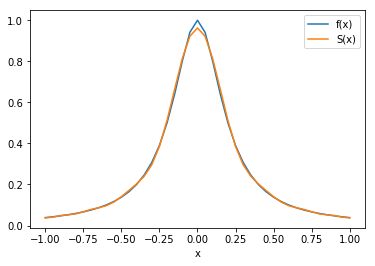

In [11]:
df.plot.line(x='x', y=['f(x)','S(x)'])

Plot $|S(x)-f(x)|$ together. We can see more clearly that the difference generally increases when approaching the origin.

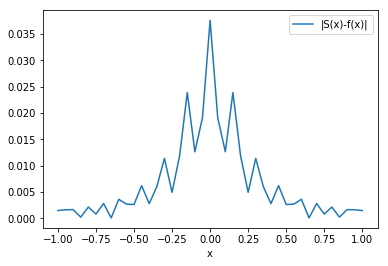

In [12]:
df.plot.line(x='x', y='|S(x)-f(x)|')

## (c) Cubic Spline Function
To get the cubic spline function, we firstly construct an algorithms to compute the cubic polynomial on each small interval. The result is a list of polynomials, whose j-th component is the polynomial on each interval $[x_j,x_{j+1}],\quad j=0,\cdots,n$. (Showed in output)

We add two constrains to the spline function. That is $S''(x)\big|_{x=\pm 1}=f''(x)\approx 0.2105$, i.e. $M_0=M_n=0.2105$. According to equation(36), we have $\lambda_0=\mu_n = 0,\quad d_0=d_n=2M_0=0.421$.

In [13]:
def cubic_splines(nodes, lam_0, mu_n, d_0, d_n):
    n = len(nodes) - 1
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]
    h = [x[j+1] - x[j] for j in range(0, n)]
    mu = [None] + [h[j-1] / (h[j-1] + h[j]) for j in range(1,n)] + [mu_n]
    lam = [lam_0] + [h[j] / (h[j-1] + h[j]) for j in range(1,n)] + [None]
    d = [6 * (y[j-1] / h[j-1] / (h[j-1]+h[j]) +\
             y[j+1] / h[j] / (h[j-1]+h[j]) -\
             y[j] / h[j-1] / h[j]) for j in range(1, n)]
    d = [d_0] + d + [d_n]
    
    coefficient_matrix =  np.zeros((n+1,n+1))
    for i in range(n+1):
        coefficient_matrix[i][i] = 2
    for i in range(n):
        coefficient_matrix[i][i+1] = lam[i]
        coefficient_matrix[i+1][i] = mu[i+1]
        
    M = solve(coefficient_matrix, d)
        
    A = [(y[j+1] - y[j]) / h[j] - h[j] / 6 * (M[j+1] - M[j])  for j in range(n)]
    B = [y[j] - M[j] * h[j] ** 2 / 6  for j in range(n)]
    
    S = [np.poly1d([-M[j]]) / 6 / h[j] * np.poly1d([1, -x[j+1]]) ** 3 +\
        np.poly1d([M[j+1]]) / 6 / h[j] * np.poly1d([1, -x[j]]) ** 3 + A[j] * np.poly1d([1, -x[j]]) + B[j]
        for j in range(n)]
    # Bug if M[] is not converted into 'poly1d' object!
    return S


splines = cubic_splines(uniform_nodes_of_Runge, lam_0=0, mu_n=0, d_0=0.421, d_n=0.421)

for i in range(len(splines)):
    print('[', '%.1f' % (uniform_nodes_of_Runge[i][0]), ',',
          '%.1f' % (uniform_nodes_of_Runge[i+1][0]),  ']:')
    print(np.poly1d(splines[i]))

[ -1.0 , -0.9 ]:
        3          2
0.1577 x + 0.5785 x + 0.7576 x + 0.3753
[ -0.9 , -0.8 ]:
        3          2
0.2738 x + 0.8917 x + 1.04 x + 0.4599
[ -0.8 , -0.7 ]:
        3         2
0.4633 x + 1.347 x + 1.403 x + 0.5569
[ -0.7 , -0.6 ]:
        3       2
0.8697 x + 2.2 x + 2.001 x + 0.6964
[ -0.6 , -0.5 ]:
      3         2
1.58 x + 3.479 x + 2.768 x + 0.8498
[ -0.5 , -0.4 ]:
       3         2
3.544 x + 6.425 x + 4.241 x + 1.095
[ -0.4 , -0.3 ]:
       3         2
5.728 x + 9.046 x + 5.29 x + 1.235
[ -0.3 , -0.2 ]:
       3         2
12.53 x + 15.17 x + 7.127 x + 1.419
[ -0.2 , -0.1 ]:
        3         2
-32.79 x - 12.02 x + 1.688 x + 1.056
[ -0.1 , -0.0 ]:
        3         2
-89.07 x - 28.91 x - 3.109e-15 x + 1
[ -0.0 , 0.1 ]:
       3         2
89.07 x - 28.91 x - 3.997e-15 x + 1
[ 0.1 , 0.2 ]:
       3         2
32.79 x - 12.02 x - 1.688 x + 1.056
[ 0.2 , 0.3 ]:
        3         2
-12.53 x + 15.17 x - 7.127 x + 1.419
[ 0.3 , 0.4 ]:
        3         2
-5.728 x + 9.046 x

Using the polynomial expressions above, we can compute the function value $S(x)$ of each of the 41 points.

Show $f(x),\ S(x),\ |S(x)-f(x)|$ in the following table. Compared to polynomial interpolation in (a), (b), the cubic spline function is more accurate in fitting Runge function. And no sigular points as well.

In [14]:
spline_function_values = []
for j in range(len(uniform_points_of_Runge)-1):
    spline_function_values.append(splines[j//2](uniform_points_of_Runge[j]))
spline_function_values.append(splines[-1](uniform_points_of_Runge[-1]))

df = DataFrame({'x':uniform_points_of_Runge, 'S(x)':spline_function_values,
                'f(x)':Runge_values, '|S(x)-f(x)|':abs(spline_function_values - Runge_values)},
               columns=['x', 'f(x)', 'S(x)', '|S(x)-f(x)|'])
df.round({'x': 2})

,x,f(x),S(x),|S(x)-f(x)|
0,-1.00,0.038462,0.038462,8.326673e-17
1,-0.95,0.042440,0.042438,2.412308e-06
2,-0.90,0.047059,0.047059,2.844947e-16
3,-0.85,0.052459,0.052457,1.922724e-06
4,-0.80,0.058824,0.058824,9.714451e-17
5,-0.75,0.066390,0.066387,2.902889e-06
6,-0.70,0.075472,0.075472,4.163336e-17
7,-0.65,0.086486,0.086475,1.100250e-05
8,-0.60,0.100000,0.100000,2.359224e-16
9,-0.55,0.116788,0.116786,1.943161e-06


Plot $f(x)$ and $S(x)$ together. Compared to polynomial interpolation, cubic spline function fits much better in general.

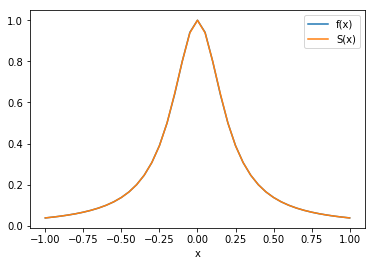

In [15]:
df.plot.line(x='x', y=['f(x)', 'S(x)'])

Plot $|S(x)-f(x)|$. It's very interesting that the error is larger around the origin, just opposed to polynomial interpolation in (a).

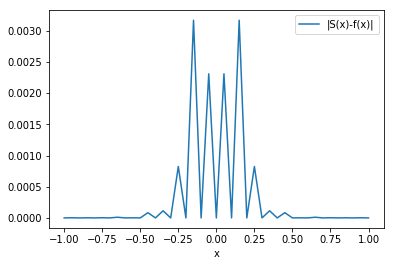

In [16]:
df.plot.line(x='x', y='|S(x)-f(x)|')

Lastly, let's put the deviation of the fitting function from $f(x)$ in three method together in the diagram below.

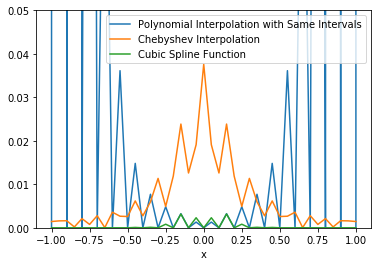

In [17]:
df = DataFrame({'x':uniform_points_of_Runge,
                'Polynomial Interpolation with Same Intervals':abs(P20_values - Runge_values),
                'Chebyshev Interpolation':abs(Chebyshev_values - Runge_values),
                'Cubic Spline Function':abs(spline_function_values - Runge_values)},
               columns=['x', 'Polynomial Interpolation with Same Intervals',
                        'Chebyshev Interpolation', 'Cubic Spline Function'])
df.plot.line(x='x', y=['Polynomial Interpolation with Same Intervals',
                        'Chebyshev Interpolation', 'Cubic Spline Function'], ylim=[0,.05])

Summary:

1. Cubic spline function is the most accurate method in this problem, followed by Chebyshev interpolation. Polynomial interpolation with same intervals does not work when x deviates from the origin.

2. Cubic spline function and Chebyshev interpolation have a larger deviation near the origin, which is opposed to polynomial interpolation with same intervals.

# 2. 样条函数在计算机绘图中的应用
## (a) 
Consruct the polar equation of cardioid $r(\phi)$. Calculate $\phi,\ x_t,\ y_t$, showed in the table below.

In [18]:
def cardioid(phi, a=0.5):
    return 2 * a * (1 - np.cos(phi))

def phi(t):
    return t * np.pi /4

def cardioid_coord(t):
    return { 'x': cardioid(phi(t)) * np.cos(phi(t)),
            'y': cardioid(phi(t)) * np.sin(phi(t))}

t_nodes = list(range(9))
phi_nodes = [phi(t)  for t in t_nodes]

x_nodes = [cardioid_coord(t)['x'] for t in t_nodes]
y_nodes = [cardioid_coord(t)['y'] for t in t_nodes]

DataFrame({'t':t_nodes, 'phi':phi_nodes, 'x_t':x_nodes, 'y_t':y_nodes},
               columns=['t', 'phi', 'x_t', 'y_t'])

,t,phi,x_t,y_t
0,0,0.000000,0.000000e+00,0.000000e+00
1,1,0.785398,2.071068e-01,2.071068e-01
2,2,1.570796,6.123234e-17,1.000000e+00
3,3,2.356194,-1.207107e+00,1.207107e+00
4,4,3.141593,-2.000000e+00,2.449294e-16
5,5,3.926991,-1.207107e+00,-1.207107e+00
6,6,4.712389,-1.836970e-16,-1.000000e+00
7,7,5.497787,2.071068e-01,-2.071068e-01
8,8,6.283185,0.000000e+00,-0.000000e+00


## (b)
Use cubic spline function coded earlier to construct $S_{\Delta}(x;t),\ S_{\Delta}(y;t)$.

In this case, it's natural to choose periodic constrains on the spline functions, for the 1st and 2nd derivative of spline functions at $\phi=0$ must equal to that at $\phi=2\pi$. Under this constrains, however, the earlier code no longer works, because the coefficient matrix is not a three diagonal one. Therefore, I still choose to make constrains on 2nd derivatives.

For $S_{\Delta}(x;t),\ S''_{\Delta}(x;t)\big|_{t=0\ \text{or}\ 8}=x_t''\big|_{t=0 \text{or} 8}\approx 1.2337.\quad M_0=M_{n=8}=1.2337,\ \lambda_0=\mu_n = 0,\ d_0=d_n=2M_0=2.4674.$ 

For $S_{\Delta}(y;t),\ S''_{\Delta}(y;t)\big|_{t=0\ \text{or}\ 8}=y_t''\big|_{t=0 \text{or} 8}\approx 0.\quad \lambda_0=\mu_n = 0,\ d_0=d_n=0.$



In [19]:
splines_x = cubic_splines(nodes=[[t, x] for t, x in zip(t_nodes, x_nodes)],
                          lam_0=0, mu_n=0, d_0=2.4674, d_n=2.4674)

print('cubic spline function of x:')
for i in range(len(splines_x)):
    print('[', str(t_nodes[i]), ',', str(t_nodes[i+1]),  ']:')
    print(np.poly1d(splines_x[i], variable='t'))
    

cubic spline function of x:
[ 0 , 1 ]:
         3          2
-0.2992 t + 0.6169 t - 0.1105 t
[ 1 , 2 ]:
         3          2
-0.1518 t + 0.1745 t + 0.3318 t - 0.1474
[ 2 , 3 ]:
        3        2
0.3206 t - 2.66 t + 6 t - 3.926
[ 3 , 4 ]:
        3         2
0.2837 t - 2.327 t + 5.003 t - 2.93
[ 4 , 5 ]:
         3         2
-0.2837 t + 4.481 t - 22.23 t + 33.38
[ 5 , 6 ]:
         3         2
-0.3206 t + 5.034 t - 25 t + 37.99
[ 6 , 7 ]:
        3         2
0.1518 t - 3.468 t + 26.02 t - 64.04
[ 7 , 8 ]:
        3         2
0.2992 t - 6.565 t + 47.69 t - 114.6


In [20]:
splines_y = cubic_splines(nodes=[[t, y] for t, y in zip(t_nodes, y_nodes)],
                          lam_0=0, mu_n=0, d_0=0, d_n=0)

print('cubic spline function of y:')
for i in range(len(splines_y)):
    print('[', str(t_nodes[i]), ',', str(t_nodes[i+1]),  ']:')
    print(np.poly1d(splines_y[i], variable='t'))

cubic spline function of y:
[ 0 , 1 ]:
        3
0.1735 t + 0.03361 t
[ 1 , 2 ]:
         3         2
-0.2817 t + 1.366 t - 1.332 t + 0.4552
[ 2 , 3 ]:
         3          2
-0.2183 t + 0.9853 t - 0.5714 t - 0.05185
[ 3 , 4 ]:
        3         2
0.3265 t - 3.918 t + 14.14 t - 14.76
[ 4 , 5 ]:
        3         2
0.3265 t - 3.918 t + 14.14 t - 14.76
[ 5 , 6 ]:
         3         2
-0.2183 t + 4.254 t - 26.72 t + 53.34
[ 6 , 7 ]:
         3         2
-0.2817 t + 5.395 t - 33.57 t + 67.03
[ 7 , 8 ]:
        3         2
0.1735 t - 4.164 t + 33.34 t - 89.1


## (c)
Plot cubic spline function $(x_t, y_t)$ and original Cardioid curve $(x,y)$ together with nodes pointed. Given that the number of nodes is limited, the result turned out to be satisifing!

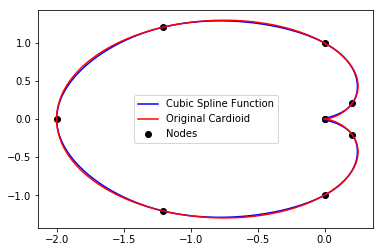

In [21]:
def cubic_spline_function(t, t_nodes, splines):
    return sum([splines[i](t) * ((t >= t_nodes[i]) and (t < t_nodes[i+1]))
                for i in range(len(t_nodes)-1)])

step_number = 100000
# this step number may cost much time, you can diminish it if you don't mind getting worse quanlity
t_values = np.linspace(0, 8, step_number)

fit_x_values = np.array([])
fit_y_values = np.array([])
for t in t_values:
    x = cubic_spline_function(t, t_nodes, splines_x)
    fit_x_values = np.append(fit_x_values, np.linspace(x, x, 1))
    y = cubic_spline_function(t, t_nodes, splines_y)
    fit_y_values = np.append(fit_y_values, np.linspace(y, y, 1))
    
plt.plot(fit_x_values, fit_y_values,'b',label='Cubic Spline Function')

real_x_values = np.array([])
real_y_values = np.array([])
for t in t_values:
    x = cardioid_coord(t)['x']
    real_x_values = np.append(real_x_values, np.linspace(x, x, 1))
    y = cardioid_coord(t)['y']
    real_y_values = np.append(real_y_values, np.linspace(y, y, 1)) 

plt.plot(real_x_values, real_y_values,'r',label='Original Cardioid')


plt.scatter(x_nodes, y_nodes, color='black', label='Nodes')

plt.legend()

## (c)
The point is that the 1st and 2nd derivatives of $x$ and $y$  with respect to $t$ are continuous along the fitting curve, including the nodes. Therefore, the gradient and curvature are continuous, which gives the fitting curve  a smooth appearance.

# 3. 含有zeta函数的方程求解
## (a)
### Analyse the Problem
Define $\overline{\mathcal{Z}_{00}}(1;q^2)\big|_{l}$ in the following way. For the second equality sign, we change $t \rightarrow t^2$ in the first integration to avoid the singularity at $t=0$.

$$  \overline{\mathcal{Z}_{00}}(1;q^2)\big|_{l} = - \pi + \frac { \pi } { 2 }  \int _ { 0 } ^ { 1 } d t \ t ^ { - 3 / 2 } \left( e ^ { t q ^ { 2 } } - 1 \right) + \frac{1}{\sqrt{4\pi}} \sum _ { \mathbf { n } \leq  l } \frac { e ^ { q ^ { 2 } - \mathbf { n } ^ { 2 } } } { \mathbf { n } ^ { 2 } - q ^ { 2 } } + \pi (1-\delta_{\mathbf{n}0}) \int _ { 0 } ^ { 1 } d t \ t ^ { - 3 / 2 } e ^ { t q ^ { 2 } } e ^ { - \left( \pi ^ { 2 } / t \right) \mathbf { n } ^ { 2 } } $$
$$ = - \pi + \pi \int _ { 0 } ^ { 1 } d t \ t ^ { - 2 } \left( e ^ { t ^ 2 q ^ { 2 } } - 1 \right) + \frac{1}{\sqrt{4\pi}} \sum _ { \mathbf { n } \leq  l } \frac { e ^ { q ^ { 2 } - \mathbf { n } ^ { 2 } } } { \mathbf { n } ^ { 2 } - q ^ { 2 } } + \pi (1-\delta_{\mathbf{n}0}) \int _ { 0 } ^ { 1 } d t \ t ^ { - 3 / 2 } e ^ { t q ^ { 2 } } e ^ { - \left( \pi ^ { 2 } / t \right) \mathbf { n } ^ { 2 } }$$

Here, the notation $\mathbf { n }  = (n_1, n_2, n_3) \leq  l$ means $n_i \leq  l,\ i=1,2,3$.

Naturally, we have:

$$  \overline{\mathcal{Z}_{00}}(1;q^2)\big|_{l\rightarrow \infty} = \mathcal{Z}_{00}(1;q^2)$$


To work out the problem, we need to compute the change of $\overline{\mathcal{Z}_{00}}(1;q^2)$ when you gradully increase the range of (each component of) $\mathbf{n}$.

###  Numerical Integration
To compute the integrals in the problem, we build algorithm using Simpson's rule. The parameter "peices_number" of it is the number of pieces you divide the whole interval into to later apply Simpson's rule. We use $\int_{0}^{\pi/2} sinx\ dx$ to test our algorithm, and find the result is accurate enough in our problem.

In [22]:
def integration_Simpson(integrand, bounds, pieces_number=1000):
    interval = (bounds[1] - bounds[0]) / (2 * pieces_number)
    divide_points = np.array([integrand(x) 
                     for x in np.arange(bounds[0], bounds[1] + interval, interval)])
    weights = np.array([1] + [4, 2] * (pieces_number - 1) + [4, 1])
    return interval / 3 * sum(divide_points * weights)

'%.15e' % integration_Simpson(lambda x: np.sin(x), (0, np.pi / 2))

'1.000000000000002e+00'

### Computing Zeta Function
Construct an algorithm to compute $\overline{\mathcal{Z}_{00}}(1;q^2)\big|_{l}$.

In [23]:
def zeta_00_sum_terms(q2, n2_max=150):
    sum_terms = {}
    for n2 in range(0, n2_max+1):
        term = np.exp(q2 - n2) / (n2 - q2 )
        if not n2 == 0:
            integrand = lambda t: 0 if t==0\
            else t ** (-3/2) * np.exp(t * q2) * np.exp(-np.pi ** 2 / t * n2)
            term = term + np.pi * integration_Simpson(integrand, bounds=(0, 1))
        term = term / np.sqrt(4 * np.pi)
        sum_terms[n2] = term
    return sum_terms

def zetabar_00(q2, l, s=1):
    result = -np.pi
    integrand = lambda t: q2 if t==0 else t ** (-2) * (np.exp(t ** 2 * q2) - 1)
    result = result + np.pi * integration_Simpson(integrand, bounds=(0, 1))
    #print(np.pi * integration_Simpson(integrand, bounds=(0, 1)))
    sum_terms = zeta_00_sum_terms(q2, n2_max=3 * l **2)
    result = result + sum([sum_terms[n1**2 + n2**2 + n3**2]
     for n1 in range(-l, l+1)
     for n2 in range(-l, l+1)
     for n3 in range(-l, l+1)])
    return result

zetabar_00(1.5, 5)

1.3751096028849716

Compute $\overline{\mathcal{Z}_{00}}(1;q^2)\big|_{l}$ for $q^2=2.9 , 0.1$. 

In [24]:
print('q^2=2.9')
for l in range(8):
    print('l=%d' % l, '%.11e' % zetabar_00(2.9, l))

print('q^2=0.1')
for l in range(8):
    print('l=%d' % l, '%.11e' % zetabar_00(0.1, l))

q^2=2.9
l=0 1.34324166161e+01
l=1 1.86456165446e+01
l=2 1.96575465200e+01
l=3 1.96592557848e+01
l=4 1.96592565599e+01
l=5 1.96592565600e+01
l=6 1.96592565600e+01
l=7 1.96592565600e+01
q^2=0.1
l=0 -5.93972038132e+00
l=1 -4.86578551506e+00
l=2 -4.84330440037e+00
l=3 -4.84323045469e+00
l=4 -4.84323041542e+00
l=5 -4.84323041541e+00
l=6 -4.84323041541e+00
l=7 -4.84323041541e+00


### Two Extreme Cases
From the results above, we guess that $l=7$ may be enough for 12-digit accuracy in most cases. But before trying on more values of $q^2$, it's necessary to consider two extreme cases.

- $q^2$ is very close to the square of an integer. 
$\lim\limits_{q^2 \to {n^2 \pm 0}} \frac { e ^ { q ^ { 2 } - \mathbf { n } ^ { 2 } } } { \mathbf { n } ^ { 2 } - q ^ { 2 } } = \frac { 1 } { \mp0 } = \mp \infty $. Other terms ($\mathbf{n}\neq0$) are negligible compared with it. So fewer terms of summation is needed in that case.

- $\mathcal{Z}_{00}(1;q^2) \approx 0.$
Given that $\lim\limits_{q^2 \to {n^2 + 0}} \frac { e ^ { q ^ { 2 } - \mathbf { n } ^ { 2 } } } { \mathbf { n } ^ { 2 } - q ^ { 2 } } = -\infty $ and $\lim\limits_{q^2 \to {(n+1)^2 - 0}} \frac { e ^ { q ^ { 2 } - \mathbf { (n+1) } ^ { 2 } } } { \mathbf { (n+1) } ^ { 2 } - q ^ { 2 } } = +\infty $, there must be a zero point in $(n,n+1).$ And the relative error will go to infinity when approaching the zero points. We cannot guarantee any significance digit accuracy as a result.

Except the extrme cases, we compute $\overline{\mathcal{Z}_{00}}(1;q^2)\big|_{l}$ for $l=0,2,\cdots,7$ and for more "general" values of $q^2$ to get required $l$ for 6-digit and 12-digit accuracy respectively.

In [25]:
def accuracy_check(q2):
    former, latter = 0, 0
    print('q^2=', q2)
    six_digit = False
    for l in range(8):
        latter = zetabar_00(q2, l)
        if '%.11e' % former == '%.11e' % latter:
            print('twelve digit:', l)
            break
        elif '%.5e' % former == '%.5e' % latter and not six_digit:
            print('six digit:', l , end='\t')
            six_digit = True
        former = latter

for q2 in [1e-3] + list(np.arange(1-1e-3, 3, 0.2)):
    accuracy_check(q2)

q^2= 0.001
six digit: 3	twelve digit: 5
q^2= 0.999
six digit: 3	twelve digit: 5
q^2= 1.199
six digit: 4	twelve digit: 6
q^2= 1.399
six digit: 4	twelve digit: 6
q^2= 1.5990000000000002
six digit: 4	twelve digit: 6
q^2= 1.7990000000000004
six digit: 4	twelve digit: 5
q^2= 1.9990000000000006
six digit: 3	twelve digit: 5
q^2= 2.1990000000000003
six digit: 4	twelve digit: 5
q^2= 2.3990000000000005
six digit: 4	twelve digit: 6
q^2= 2.5990000000000006
six digit: 4	twelve digit: 6
q^2= 2.799000000000001
six digit: 4	twelve digit: 6
q^2= 2.999000000000001
six digit: 3	twelve digit: 5


From the results above, we see that 6-digit accuracy generally requires $l\geq4$ ($9^3=729$ terms computed) and 12-digit accuracy $l\geq6$ ($13^3=2197$ terms computed).

In later computation, we will choose $l=6$ for both accuracy (except for points near zero points) and economy. 

## (b)
In this section, we want to find the cross point of $S(q^2) = \pi^{3/2}(\frac { 1 } { A _ { 0 } } + \frac { R _ { 0 } } { 2 } q ^ { 2 })$ and $\mathcal{Z}_{00}(1;q^2)$.

In [26]:
def scatter_expansion(q2):
    return (np.pi) ** (3/2) * (1 / 1.0 + 0.5 / 2 * q2)

q2_values = np.linspace(0, 1, 50)
zeta_values = np.array([zetabar_00(q2, l=6) for q2 in q2_values])
expansion_values = np.array([scatter_expansion(q2) for q2 in q2_values])

df = DataFrame({'q^2':q2_values, 'Zeta Function Values':zeta_values,
                'Scatter Expansion Values':expansion_values},
               columns=['q^2', 'Zeta Function Values', 'Scatter Expansion Values'])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


Plot two functions on $(0,1)$. We get the crosspoint at $q^2$ slightly smaller that 1 as told.

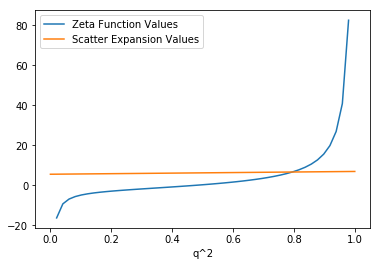

In [27]:
df.plot.line(x='q^2', y=['Zeta Function Values', 'Scatter Expansion Values'])

Zoom in to know the cross point exists near $q^2=0.8$. 

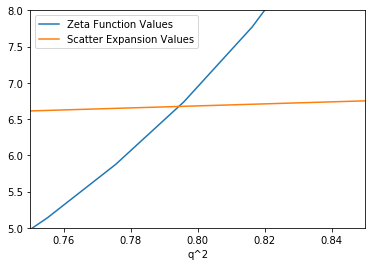

In [28]:
df.plot.line(x='q^2', y=['Zeta Function Values', 'Scatter Expansion Values'],
             xlim=[0.75,0.85], ylim=[5,8])

Search it on $[0.78,0.82]$, naively using binary search algorithm. When the binary interval's length is smaller than $0.5\times10^6$, 6-digit accuracy is supposed to be satisfied.

In [29]:
q2_r, q2_l = 0.82, 0.78
while q2_r - q2_l > 5e-7:
    q2_m = (q2_r + q2_l) / 2
    if zetabar_00(q2_m, l=6) > scatter_expansion(q2_m):
        q2_r = q2_m
    else:
        q2_l = q2_m

print('q^2 = %.6f' % q2_m)
print('Zeta function value =', zetabar_00(q2_m, l=6))

q^2 = 0.794516
Zeta function value = 6.674360222784506


From the above result, we see the solution is not close to zero points. So the $l$ we choose should be safe. And we check the accuray for more safety.

In [30]:
accuracy_check(q2_m)

q^2= 0.7945156860351562
six digit: 4	twelve digit: 5


In fact, the result is not that accurate, because the scattering expansion is merely 1st order accurate. But the first few digits is trustful at least.